# Multidimensional Calculus: Part VII
## Stokes Theorem
Puede verificar este teorema en el
[enlace de Wikepedia](https://en.wikipedia.org/wiki/Stokes%27_theorem).

La idea es que si $F$ es un campo vectorial y $C$ una curva cerrada, entonces

$$ \oint_C F \cdot d r = \iint\limits_R \nabla \times F dA .$$
asumiendo ciertas hipotesis (diferenciabilidad, etc),


Hasta el momento hemos calculado estas integrales con las "unhas". Pero `SymPy' tiene herramientas sofisticadas para esto.

El siguiente ejemplo es tomado del manual de `SymPy`.

Para la trayectoria $C$ asumimos un cuarto de circunferencia en el primer cuadrante (de radio $R=1$) $(\cos \theta, \sin \theta)$. La funcion a integrar es  $F=(y, 0, x+z)$.

Con esto tenemos que, el camino lo descomponemos en tres partes $C =C_1 \cup C_2 \cup C_3 $


\begin{eqnarray}
C1 = (x, 0), x \in [0,1], y=0 dy = 0 \\
C2 = (\cos t, \sin t), t \in [0, \pi/2] \\
C_3 = (0,y), y \in [1,0], dx = 0 , x=0\\
z=dz=0
\end{eqnarray}

La integral de la izquierda seria

$f(r) \cdot dr = y dx + 0 dy + (x+z) dz .$$

$$\oint_C f(r) \cdot dr = \int_0^1 0 dx + 0 dy + (x+z) 0 + \int_0^{\pi/2} \sin t(- \sin t) dt + 0 dy + (x+z) 0 + \int_1^0  y 0 + 0 dy + (x+z) 0  = -\int_0^{\pi/2} \sin^2 t  .$$.$$

\begin{eqnarray}
\oint_C f(r) \cdot r &=& -\int_0^{\pi/2} \sin^2 t dt \\
&=& -\int_0^{\pi/2} \frac{1 - \cos 2t}{2} dt  \\
&=&\frac12 \left ( \frac{\sin(2t)}{{2}} - t  \right )_0^{\pi/2} \\
&=& -\frac{\pi}{4}
\end{eqnarray}

La integral de la deracha. El vector normal es $n=(0,0,1)$
El rotacional


$$\nabla F = \det
\begin{pmatrix}
\hat{i}  & \hat{j} & \hat{k} \\
\frac{\partial}{\partial x} & \frac{\partial}{\partial y} & \frac{\partial }{\partial z} \\
F_x & F_y & F_x \\
\end{pmatrix}
= \begin{pmatrix}
\hat{i}  & \hat{j} & \hat{k} \\
\frac{\partial}{\partial x} & \frac{\partial}{\partial y} & \frac{\partial }{\partial z} \\
y & 0 & x+z
\end{pmatrix}  = 0 \hat{i} - \hat{j} -\hat{k}.$$

De forma que

$$\nabla F \cdot n = -1 .$$

De forma que la integral de la derecha tiene integrando -1 sobre el area $A$ que es un cuarto de circulo unitario. Es decir que tiene valor

$$\int_D F \times n dS = - \frac{\pi}{4} .$$

In [1]:
# la curva
import sympy as sp
from sympy import symbols
from sympy.vector import curl, ParametricRegion
theta = symbols('theta')
curve = ParametricRegion( ( sp.cos(theta), sp.sin(theta)), (theta, 0, sp.pi/2))
curve

ParametricRegion((cos(theta), sin(theta)), (theta, 0, pi/2))

In [2]:
# la superficie
# cuarto de circulo de radio 1
r = symbols('r', positive=True)
surface = ParametricRegion( (r*sp.cos(theta), r*sp.sin(theta)), (r, 0,1), (theta, 0, sp.pi/2))
surface

ParametricRegion((r*cos(theta), r*sin(theta)), (r, 0, 1), (theta, 0, pi/2))

In [3]:
# definamos las funciones F en coordenadas Cartesianas.
from sympy.vector import CoordSys3D, vector_integrate
C = CoordSys3D('C')
F = C.y*C.i + C.z*C.k + C.x*C.k   # (y, 0, x+ z)
F




C.y*C.i + (C.x + C.z)*C.k

In [4]:
vector_integrate( F, curve) # lado izquierto int f.dr

-pi/4

In [5]:
#lado derecho int curl F dA

vector_integrate( curl(F), surface)

-pi/4

### Actividad #1
Grafique la curva y la superficie usando ParametricRegion.

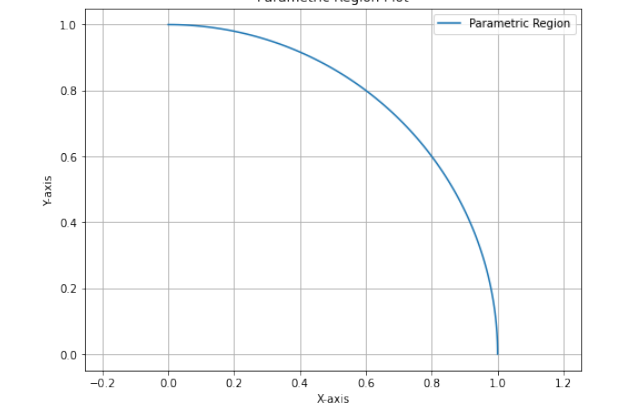

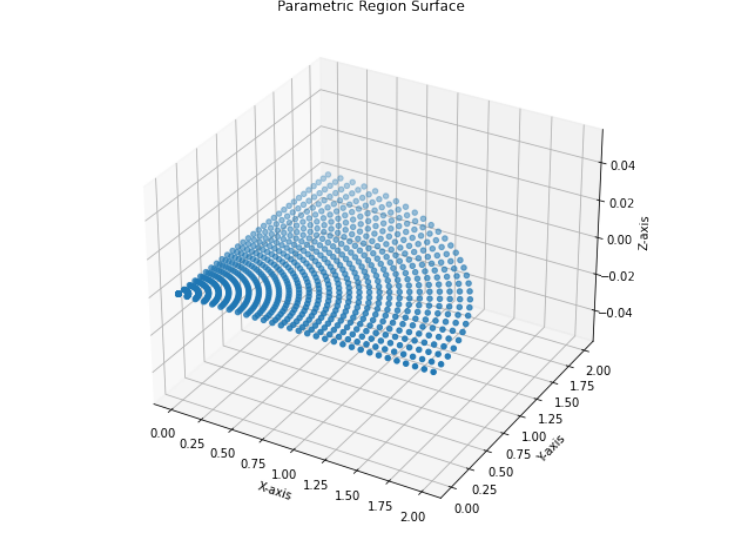

## Teorema de Gauss:
Dado un campo $F$ (diferenciable) en un volumen cerrado $D$ con superficie $S$ tenemos


$$\iint\limits_S F  \cdot n dS =  \iiint\limits_D \nabla \cdot F dV .$$

Ejemplo: Considere el campo $F=(x^3 , y^3 , z^3)$ sobre una superficie esferica de radio $4$. Parametrizada


$$ 4 [ \sin \phi \cos \theta, \sin \phi \sin \theta, \cos \phi] .$$

La normal a la superficie es el radio unitario

$$ n =  [ \sin \phi \cos \theta, \sin \phi \sin \theta, \cos \phi] .$$

A mano $x^3 = 64 \sin^4 \pi \cos^4 \theta$ y asi con los otros
$$F \cdot n = 64 ( \sin^4 \phi \cos^4 \theta+ \sin^4 \phi \sin^4 \theta + \cos^4 \phi)  .$$

En coordenadas esfericas

$$dS = R^2 \sin \phi   d \phi d \theta .$$

$$ F \cdot n dS = 64 \times 16 ( \sin^4 \phi \cos^4 \theta + \sin^4 + \sin^4 \phi \sin^4 \theta + \cos^4 \phi) \sin \phi d \phi d \theta .$$

"A mano (en SymPY)"



In [6]:
from sympy import Function, Matrix
phi, theta = symbols( 'phi theta', real=True)
F, x, y, z = symbols('F x y z', cls=Function, real=True)
x = x(phi,theta)
y = y(phi,theta)
z = z(phi,theta)
F = Matrix( [x**3 , y**3, z**3])
n= ( sp.sin(phi)*sp.cos(theta), sp.sin(phi)*sp.sin(theta), sp.cos(phi))
dS = 16*sp.sin(phi)
integrand = F.dot(n)*dS
integrand


16*(x(phi, theta)**3*sin(phi)*cos(theta) + y(phi, theta)**3*sin(phi)*sin(theta) + z(phi, theta)**3*cos(phi))*sin(phi)

### Nota en campos vectorials


* Los campos vectoriales resultan de forma natural de la fisica, electromagnesmo, ondas, etc. De $\mathbb{R}^3 \to \mathbb{R}^3$.

* Aparecen naturalmente del gradiente de campos escalares. Si el campo escalar es $\mathbb{R}^n \to \mathbb{R}$, entonces $\nabla f: \mathbb{R}^n \to \mathbb{R}^n.$

* Los campos vectoriales aparecen de forma natural como parametrizaciones. Por ejemplo una esfera de radio $R$ se puede parametricar como

\begin{eqnarray}
r(u,v) : \mathbb{R}^2 & \to & \mathbb{R}^3 \\
(u,v) &\mapsto& r(u,v) = R( \sin u \cos v, \sin u \sin v, \cos v)
\end{eqnarray}

* Por ultimo, el cambio de coordenadas. Por ejemplo de Cartesianas a Esfericas o a cilindricas son funciones de
$\mathbb{R}^3 \to \mathbb{R}^3$.
\end{eqnarray}

Finalmente graficamos la superficie de una esfera



In [7]:
# hacemos la sustitucion
int2 = integrand.subs( {x: 4*sp.sin(phi)*sp.cos(theta), y:4*sp.sin(phi)*sp.sin(theta), z:4*sp.cos(phi)})
int2

16*(64*sin(phi)**4*sin(theta)**4 + 64*sin(phi)**4*cos(theta)**4 + 64*cos(phi)**4)*sin(phi)

In [8]:
from sympy import integrate
integrate( int2, (phi, 0, sp.pi), (theta, 0, 2*sp.pi))


12288*pi/5

In [9]:
# definmos la superficie y volumen de la esfera
from sympy.vector import divergence
phi, theta, r = symbols('phi theta r')
R=4
# superficie
sphere = ParametricRegion( (R*sp.sin(phi)*sp.cos(theta), R*sp.sin(phi)*sp.sin(theta),
                            R*sp.cos(phi)), (phi, 0, sp.pi), (theta, 0, 2*sp.pi))
sphere

ParametricRegion((4*sin(phi)*cos(theta), 4*sin(phi)*sin(theta), 4*cos(phi)), (phi, 0, pi), (theta, 0, 2*pi))

## Copiar pegar de mi cuaderno

In [10]:
#  define the surface of a sphere
from sympy.vector import divergence
phi, theta, r=symbols('phi theta r')
sphere = ParametricRegion( (4*sp.sin(phi)*sp.cos(theta), 4*sp.sin(phi)*sp.sin(theta), 4*sp.cos(phi)),
                          (phi, 0, sp.pi), (theta, 0, 2*sp.pi))

solidsphere = ParametricRegion( (r*sp.sin(phi)*sp.cos(theta), r*sp.sin(phi)*sp.sin(theta),
                                 r*sp.cos(phi)), (r, 0, 4), (phi,0,sp.pi), (theta, 0, 2*sp.pi))

display(solidsphere)

F = C.x**3*C.i + C.y**3*C.j + C.z**3*C.k
vector_integrate(F, sphere)

ParametricRegion((r*sin(phi)*cos(theta), r*sin(phi)*sin(theta), r*cos(phi)), (r, 0, 4), (phi, 0, pi), (theta, 0, 2*pi))

12288*pi/5

Integremos a mano.

$$\nabla \cdot  F = 3 x^2 + 3 y^2 + 3 z^2 = 3 \times 16 = 48.$$


Entonces


$$\iiint\limits_D 48 dV = \frac{48(4 \pi R^3}{3} = \frac{12288 \pi}{3} .$$

Hay un error (proxima activida)



In [11]:
# el laderecho del teorema de Gauss
vector_integrate( divergence(F), solidsphere)

12288*pi/5

### Actividad 2 (Bonus. No es obligatoria)
El primero que la acabe tiene 3 decimas en el 75%
Encuentre por que cuando lo hago a mano tengo 3 en el denominador y `SymPy` me dice que es 5.

Veamos el calculo de la integral a mano.

$$\nabla \cdot F = 3x^2 + 3 y^2 + 3 z^2 = 3(x^2 + y^2 + z^2) .$$


$$\iint\limits_S F  \cdot n dS = \iiint\limits_D 3 r^3 r^2 \sin \phi dr d \theta d \phi = \left . 3 \int_0^{2 \pi} d \theta \int_0^{\pi} d \phi \sin \phi \frac{r^5}{5} \right |_{r=0}^{r=4} = 6 \pi \frac{1024}{5} \sin_0^{\pi} \sin \phi d \phi
= \frac{12288 \pi}{5} .$$



### A note on vector fields.

* Vector fields come naturally when studying electromagnetic theory. Both, the electric and magnetic fields are fields from $\mathbb{R}^3$ to $\mathbb{R}^3$.
* Vector fields come  naturally when finding a gradient of a scalar field in $\mathbb{R}^n$. We showed an example in $\mathbb{R}^2$ above. They would become fields, in general, from $\mathbb{R}^n$ to $\mathbb{R}^n$.
* Vector fields come naturally as parameterized surfaces. For example, a sphere of radius $R$ and parameterized by $u$ and $v$ (azimuthal and polar angles) is given by the Equation


\begin{eqnarray}
r(u,v) : \mathbb{R}^2 &\to& \mathbb{R}^3 \\
(u,v) &\mapsto& r(u,v) = R  ( \sin u \cos v, \sin u \sin v, \cos v)
\end{eqnarray}

* Vector fields come naturally when chaning coordinates in $\mathbb{R}^n$. For example,  transformation from Cartesian to spherical coordinates.
We finish the calculus section by plotting a sphere of radius 1



Matrix([
[R*sin(u)*cos(v)],
[R*sin(u)*sin(v)],
[       R*cos(u)]])

Matrix([
[sin(u)*cos(v)],
[sin(u)*sin(v)],
[       cos(u)]])

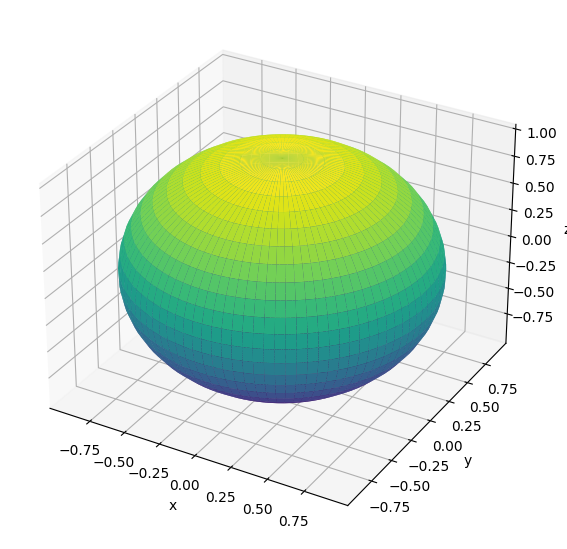

In [12]:
# grafica de ua sepera
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from sympy.plotting.plot import plot3d_parametric_surface
from sympy import Matrix, symbols
R = symbols('R', positive = True)
u,v = symbols(' u v ', real=True)


plt.rcParams['figure.figsize']=6,5.6

r = Matrix ( [ R*sp.sin(u)*sp.cos(v), R*sp.sin(u)*sp.sin(v), R*sp.cos(u)])
display(r)

sphere = r.subs(R,1)
display(sphere)

plot3d_parametric_surface( sphere[0], sphere[1], sphere[2], (u, 0, 2*sp.pi), (v, 0, sp.pi))